## Using Conditional Loop

In [4]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, END, START
import random

class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int
    
    

In [35]:
def greeting_node(state:AgentState)->AgentState:
    """ Greeting node which says hi to person"""

    state['name']= f" Hi {state['name']}!"
    state['counter'] = 0
    return state

def random_node(state:AgentState)->AgentState:
    """ Generate Random Number from 0 to 10"""

    state['number'].append(random.randint(0,10))
    state['counter'] +=1

    return state

def should_continue(state:AgentState)->AgentState:
    """Function to decide what to do"""

    if state['counter'] < 5:
        return "loop"
    else:
        return "exit"

In [36]:
# start -> greeting ->random -> random -> random -> random -> random -> END

In [37]:
graph = StateGraph(AgentState)
GREET= "Greeting"
RANDOM = "Random No"
ROUTE = "Continue?"

graph.add_node(GREET, greeting_node)
graph.add_node(RANDOM, random_node)
# graph.add_node(ROUTE,should_continue)

graph.add_edge(START, GREET)
graph.add_edge(GREET, RANDOM)
graph.add_conditional_edges(RANDOM,should_continue,{ "loop": RANDOM, "exit":END})

app = graph.compile()


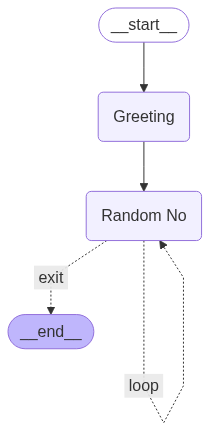

In [38]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [39]:
# context= AgentState(name="Emmanuel", number=[], counter=-1)
# result = app.invoke(context)

result = app.invoke({
    "name":"Emmanuel",
    "number":[],
    "counter":-1
})
result

{'name': ' Hi Emmanuel!', 'number': [6, 3, 5, 4, 1], 'counter': 5}